In [1]:
# We use logistic regression as a form of classification
# This most common case is a binary classification
# The sigmoid (aka logistic) function takes in any value and outputs it between 0 and 1 

# Evaluation
# Confusion matrix
#   True Positives, True Negatives, 
#   False Positives (Type 1 Error), False Negatives (Type 2 Error)
# Positive Rate:   TP + TN / Total
# Error Rate:      FP + FN / Total

# Type 1 Error -> Telling a man they're pregnant
# Type 2 Error -> Telling a pregnant Woman she's not pregnanat

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fname_train = '/Users/bcutrell/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Logistic-Regression/titanic_train.csv'
fname_test = '/Users/bcutrell/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Logistic-Regression/titanic_test.csv'

df = pd.read_csv(fname_train)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


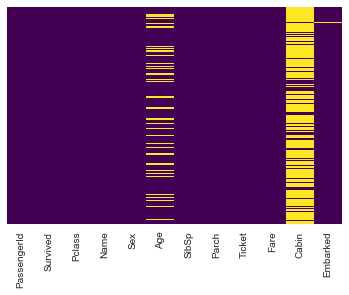

In [8]:
# yellow is true
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

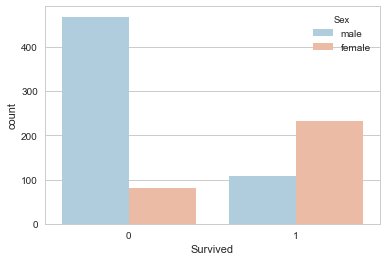

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

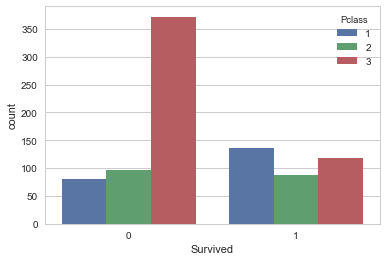

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=df)

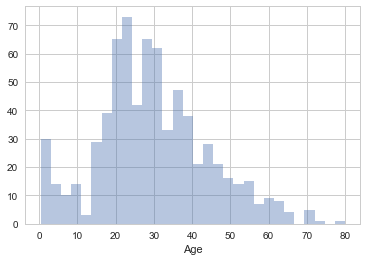

In [16]:
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

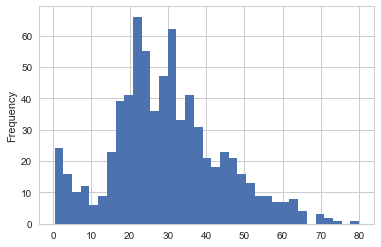

In [17]:
df['Age'].plot.hist(bins=35)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


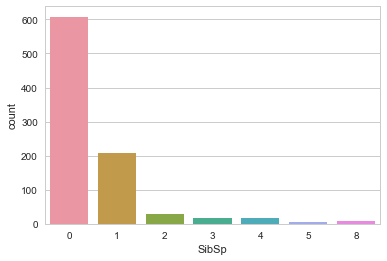

In [20]:
sns.countplot(x='SibSp', data=df)

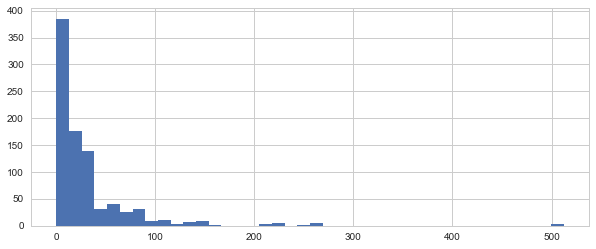

In [22]:
df['Fare'].hist(bins=40, figsize=(10,4))

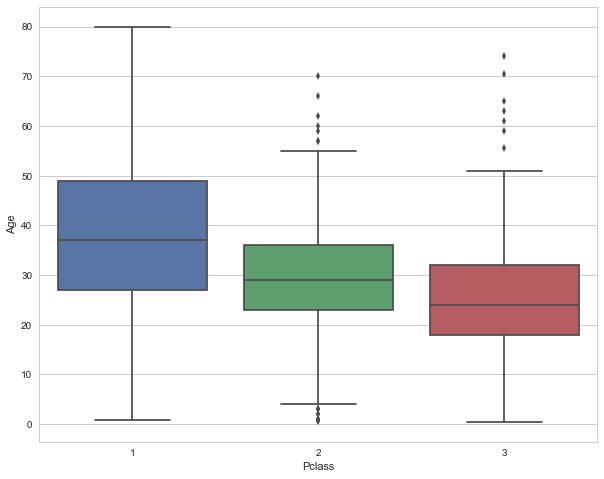

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=df)

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)
# axis = 1 -> apply to columns

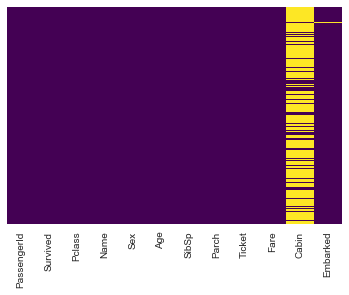

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [32]:
df.drop('Cabin', axis=1, inplace=True)

In [33]:
df.dropna(inplace=True)

In [38]:
# Categorical values must be converted into dummy values ( male/female -> 0/1)

# using get dummies can cause the issue of multicolliniarity
# columns become perfect predictors of other columns
# fix this by using drop_first=True

sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)

In [43]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df.head(2)

In [42]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [44]:
# ??? Question ???
# Better to use get_dummies for Pclass?

In [45]:
X= df.drop('Survived', axis=1)
y = df['Survived']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [55]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]


In [58]:
# extra steps to potentially improve model
# use more data
# more feature engineering (tickets, names, pclass, etc.)
# use a random forest